In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from pprint import pprint

In [25]:
# Import API key
from api_keys import weather_api_key

In [26]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [27]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [28]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [54]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
country

['BR',
 'MG',
 'AO',
 'CL',
 'SO',
 'KI',
 'PE',
 'GB',
 'NZ',
 'US',
 'BR',
 'ZA',
 'PF',
 'AR',
 'ZA',
 'CA',
 'CA',
 'PF',
 'ES',
 'BY',
 'US',
 'AU',
 'PG',
 'US',
 'JP',
 'PG',
 'NZ',
 'RU',
 'AU',
 'IS',
 'NZ',
 'AU',
 'US',
 'US',
 'JP',
 'RU',
 'CL',
 'CL',
 'IS',
 'EC',
 'VN',
 'CA',
 'AU',
 'TO',
 'AU',
 'RU',
 'RU',
 'PE',
 'ID',
 'BY',
 'RU',
 'ZA',
 'TC',
 'GL',
 'NU',
 'US',
 'US',
 'RU',
 'MX',
 'IN',
 'AU',
 'US',
 'UY',
 'AU',
 'RU',
 'AU',
 'SY',
 'IN',
 'AR',
 'CK',
 'JP',
 'NZ',
 'GL',
 'IN',
 'US',
 'MU',
 'JP',
 'PE',
 'RU',
 'BR',
 'RU',
 'PH',
 'FI',
 'CN',
 'PT',
 'RU',
 'GH',
 'RU',
 'HK',
 'RU',
 'US',
 'GL',
 'NZ',
 'RU',
 'ID',
 'US',
 'ZA',
 'CA',
 'SY',
 'GL',
 'TH',
 'ID',
 'SO',
 'BR',
 'VE',
 'SS',
 'ES',
 'CA',
 'PG',
 'CL',
 'UZ',
 'US',
 'RU',
 'LY',
 'CD',
 'RU',
 'SV',
 'AR',
 'GB',
 'TD',
 'ID',
 'US',
 'NC',
 'CA',
 'RU',
 'FO',
 'MX',
 'AO',
 'KI',
 'MX',
 'NE',
 'RU',
 'RU',
 'US',
 'AU',
 'RU',
 'ID',
 'CA',
 'AR',
 'US',
 'MG',
 'RU',
 'VN',

In [98]:
#Perform API Calls
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date_unix = []

#Perform a weather check on each city using a series of successive API calls.
url = "http://api.openweathermap.org/data/2.5/weather?"
for city in cities:
# Build query URL
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    # Get weather data
    weather_response = requests.get(query_url).json()
    try:
        city_name.append(weather_response["name"])
        lat.append(weather_response["coord"]["lat"])
        lng.append(weather_response["coord"]["lon"])
        max_temp.append(weather_response["main"]["temp_max"])
        humidity.append(weather_response["main"]["humidity"])
        cloudiness.append(weather_response["clouds"]["all"])
        wind_speed.append(weather_response["wind"]["speed"])
        country.append(weather_response["sys"]["country"])
        date_unix.append(weather_response["sys"]["sunrise"])  
    except:
        city_name.append("NaN")
        lat.append("NaN")
        lng.append("NaN")
        max_temp.append("NaN")
        humidity.append("NaN")
        cloudiness.append("NaN")
        wind_speed.append("NaN")
        country.append("NaN")
        date_unix.append("NaN")

country

['ZM',
 'RU',
 'CO',
 'US',
 'NaN',
 'US',
 'CA',
 'US',
 'MX',
 'SB',
 'NZ',
 'LK',
 'AU',
 'YE',
 'NaN',
 'NaN',
 'PF',
 'ZA',
 'MG',
 'MN',
 'RU',
 'CK',
 'RU',
 'NaN',
 'NZ',
 'RU',
 'US',
 'GL',
 'CL',
 'MX',
 'NZ',
 'NaN',
 'AR',
 'NZ',
 'MX',
 'BR',
 'SE',
 'NZ',
 'BR',
 'RU',
 'GL',
 'PT',
 'UZ',
 'PG',
 'MT',
 'NaN',
 'MX',
 'ZA',
 'CA',
 'TO',
 'US',
 'ES',
 'AU',
 'PT',
 'CN',
 'JP',
 'IN',
 'US',
 'CA',
 'US',
 'GB',
 'MU',
 'PH',
 'AU',
 'JP',
 'PT',
 'ML',
 'NaN',
 'RU',
 'US',
 'CA',
 'US',
 'US',
 'PE',
 'NaN',
 'ZA',
 'KR',
 'CD',
 'CA',
 'RU',
 'RU',
 'RU',
 'RU',
 'ZA',
 'AU',
 'NL',
 'GL',
 'AU',
 'CO',
 'MZ',
 'AR',
 'ML',
 'BO',
 'ZA',
 'RU',
 'NaN',
 'RE',
 'CD',
 'ZA',
 'RU',
 'US',
 'ES',
 'EC',
 'US',
 'BR',
 'RU',
 'RU',
 'LK',
 'SA',
 'RU',
 'US',
 'IN',
 'TL',
 'RU',
 'NaN',
 'BR',
 'CL',
 'PH',
 'KZ',
 'BR',
 'PG',
 'RU',
 'BR',
 'CA',
 'HK',
 'NO',
 'MY',
 'NaN',
 'AU',
 'US',
 'NZ',
 'NZ',
 'BR',
 'US',
 'MZ',
 'NaN',
 'BR',
 'CA',
 'RU',
 'IN',
 'AU',
 

#Include a print log of each city as it'sbeing processed (with the city number and city name).

In [99]:
len(country)

617

In [100]:
weather = pd.DataFrame({"City": city_name, "Lat": lat, "Lng" : lng, "Max Temp": max_temp, "Humidity": humidity,
                        "Cloudiness": cloudiness, "Wind Speed": wind_speed, 
                        "Country": country, "Date": date_unix})
weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mporokoso,-9.37,30.12,288.35,84,73,2.94,ZM,1588997060
1,Saskylakh,71.92,114.08,258.03,93,59,2.14,RU,0
2,Juradó,7.11,-77.76,300.52,85,100,1.47,CO,1588935307
3,Sitka,57.05,-135.33,288.15,47,90,2.1,US,1588942526
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
612,Fare,-16.7,-151.02,301.23,76,97,5.29,PF,1588954703
613,Lumut,4.23,100.63,300.15,94,20,1,MY,1588979108
614,Kirensk,57.79,108.11,277.84,59,1,0.5,RU,1588970225
615,Nanga Eboko,4.68,12.37,294.38,97,87,0.72,CM,1589000254


In [101]:
#Print CSV with df
weather.to_csv("output_data/cities.csv", index = False)

In [103]:
#Read CSV File
file = "output_data/cities.csv"
weather_df = pd.read_csv(file)

weather_clean = weather_df.dropna(how="all")

weather_clean.reset_index()

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Mporokoso,-9.37,30.12,288.35,84.0,73.0,2.94,ZM,1.588997e+09
1,1,Saskylakh,71.92,114.08,258.03,93.0,59.0,2.14,RU,0.000000e+00
2,2,Juradó,7.11,-77.76,300.52,85.0,100.0,1.47,CO,1.588935e+09
3,3,Sitka,57.05,-135.33,288.15,47.0,90.0,2.10,US,1.588943e+09
4,5,Bethel,41.37,-73.41,279.26,93.0,90.0,3.89,US,1.588931e+09
...,...,...,...,...,...,...,...,...,...,...
566,612,Fare,-16.70,-151.02,301.23,76.0,97.0,5.29,PF,1.588955e+09
567,613,Lumut,4.23,100.63,300.15,94.0,20.0,1.00,MY,1.588979e+09
568,614,Kirensk,57.79,108.11,277.84,59.0,1.0,0.50,RU,1.588970e+09
569,615,Nanga Eboko,4.68,12.37,294.38,97.0,87.0,0.72,CM,1.589000e+09


In [104]:
weather_clean.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       566
Date          571
dtype: int64

In [105]:
#Inspect the data and remove the cities where the humidity > 100%.
weather_clean.loc[weather_clean["Humidity"]>100, :]

#Skipped this step because there are no cities that have humidity > 100%. 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [106]:
#Print CSV with df
weather_clean.to_csv("output_data/City_Data.csv", index = False)

In [107]:
#Read CSV File
file_clean = "output_data/City_Data.csv"
weatherdf = pd.read_csv(file_clean)

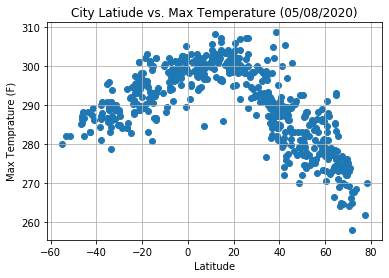

In [113]:
#Plot Latitude vs. Temperature Plot 
latitude = weatherdf["Lat"]
maxtemp = weatherdf["Max Temp"]
plt.scatter(latitude, maxtemp)
plt.title("City Latiude vs. Max Temperature (05/08/2020)")
plt.ylabel("Max Temprature (F)")
plt.xlabel("Latitude")
plt.grid()

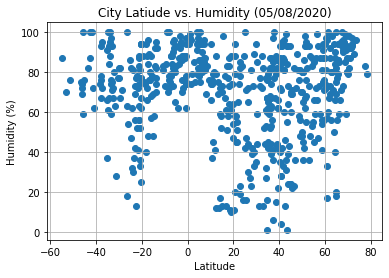

In [114]:
#Plot Latitude vs. Humidity Plot 
latitude = weatherdf["Lat"]
maxtemp = weatherdf["Humidity"]
plt.scatter(latitude, maxtemp)
plt.title("City Latiude vs. Humidity (05/08/2020)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

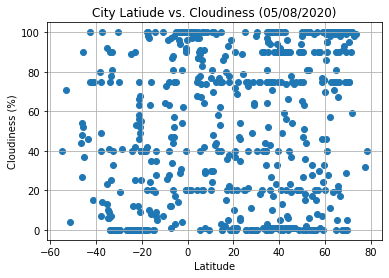

In [118]:
#Plot Latitude vs. Cloudiness Plot 
latitude = weatherdf["Lat"]
cloudiness = weatherdf["Cloudiness"]
plt.scatter(latitude, cloudiness)
plt.title("City Latiude vs. Cloudiness (05/08/2020)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

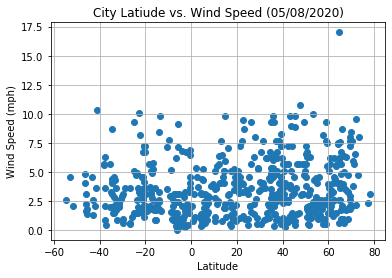

In [119]:
#Plot Latitude vs. Wind Speed Plot 
latitude = weatherdf["Lat"]
wind = weatherdf["Wind Speed"]
plt.scatter(latitude, wind)
plt.title("City Latiude vs. Wind Speed (05/08/2020)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()

In [144]:
#Northern Hemisphere (greater than or equal to 0 degrees latitude)
#Data Frame for Northern Hemsphere
north = weatherdf.loc[weatherdf["Lat"]>=0,:]

#Southern Hemisphere (less than 0 degrees latitude)
#Data Frame for Southern Hemsphere
south = weatherdf.loc[weatherdf["Lat"]<0,:]

Text(0.5, 0, 'Latitude')

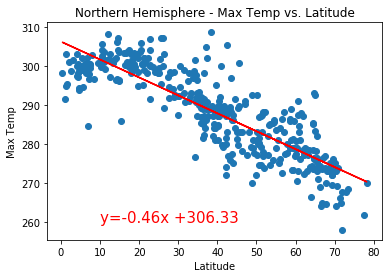

In [143]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = north["Lat"]
y_values = north["Max Temp"]

(slope,intercept,value,pvalue,stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (10,260), fontsize=15, color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")

R squarred

Text(0.5, 0, 'Latitude')

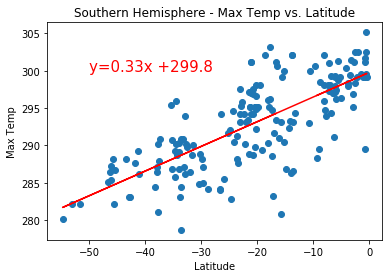

In [148]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = south["Lat"]
y_values = south["Max Temp"]

(slope,intercept,value,pvalue,stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (-50,300), fontsize=15, color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")

Text(0.5, 0, 'Latitude')

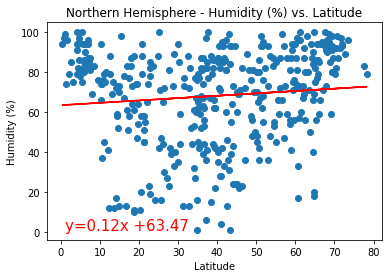

In [166]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = north["Lat"]
y_values = north["Humidity"]

(slope,intercept,value,pvalue,stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (1,1),fontsize=15, color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

Text(0.5, 0, 'Latitude')

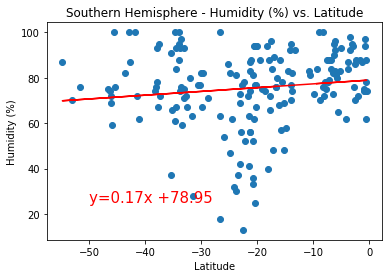

In [164]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = south["Lat"]
y_values = south["Humidity"]

(slope,intercept,value,pvalue,stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (-50,25),fontsize=15, color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

Text(0.5, 0, 'Latitude')

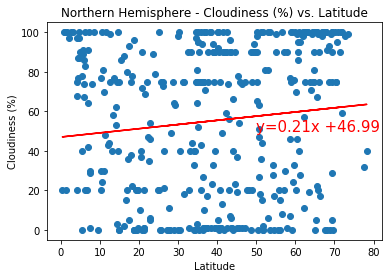

In [173]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = north["Lat"]
y_values = north["Cloudiness"]

(slope,intercept,value,pvalue,stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (50,50),fontsize=15, color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

Text(0.5, 0, 'Latitude')

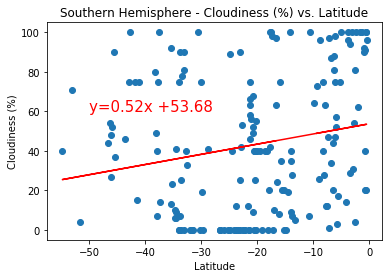

In [177]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = south["Lat"]
y_values = south["Cloudiness"]

(slope,intercept,value,pvalue,stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (-50,60),fontsize=15, color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

Text(0.5, 0, 'Latitude')

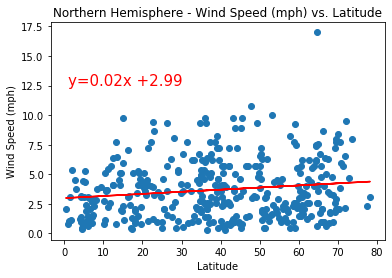

In [183]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = north["Lat"]
y_values = north["Wind Speed"]

(slope,intercept,value,pvalue,stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (1,12.5),fontsize=15, color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

Text(0.5, 0, 'Latitude')

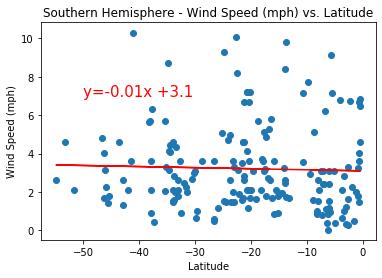

In [186]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = south["Lat"]
y_values = south["Wind Speed"]

(slope,intercept,value,pvalue,stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (-50,7),fontsize=15, color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")